# KNN with Iris

In [1]:
from IPython.display import Image

In [2]:
Image(url= "https://user-images.githubusercontent.com/22493191/49305204-8bbe3300-f4c6-11e8-9fac-ba67ed33d73f.png")

The Iris flower data set was created by Ronald Fisher in 1936. The iris dataset contains 150 samples of 3 different species of iris they are setosa (50), virginica (50), versicolor (50). 
The data is the measurements: sepal length, sepal width, petal length, petal width of each of the flowers along with the type of flower it is.


## Libraries

In [3]:
import sklearn.neighbors as nei
import pandas as pd
import sklearn.model_selection as mod

## Data

First we will load the iris data set from a URL. In this case we are using the datset from Ian Mcloughlin's github, with his permission. 

In [4]:
# Load the iris data set from a URL.
df = pd.read_csv("https://github.com/ianmcloughlin/datasets/raw/master/iris.csv")

Now we will just type df and it will show us our data. Which consits of 150 entrys. The data is broken up into the measurents of the flowers(sepal_length, sepal_width, petal_length, petal_width) and the class which is what type of iris it is(setosa, virginica, versicolor)

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


df.info() prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


We can the first fve entrys in the dataframe by typing df.head()

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can the last five entrys in the dataframe by typing df.tail()

In [8]:
df.tail()


,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Visualise

We will now import seaborn so we can visulise the data from our dataframe. The code for this is df is our data frame that we are using. hue is the different types so it can add a colour to each type and markers is to change the shape of each dot to make it easier to read. 



In [9]:
# Load the seaborn package.
import seaborn as sns
sns.pairplot(df, hue="class", markers=["o", "s", "D"])

As you can see there is an overlap in most places. Which means that virginica and versicolor are overlapping in most places and there is also the odd setosa mixed in there. Below we will try with linear regression to see if we can divide the classes. 

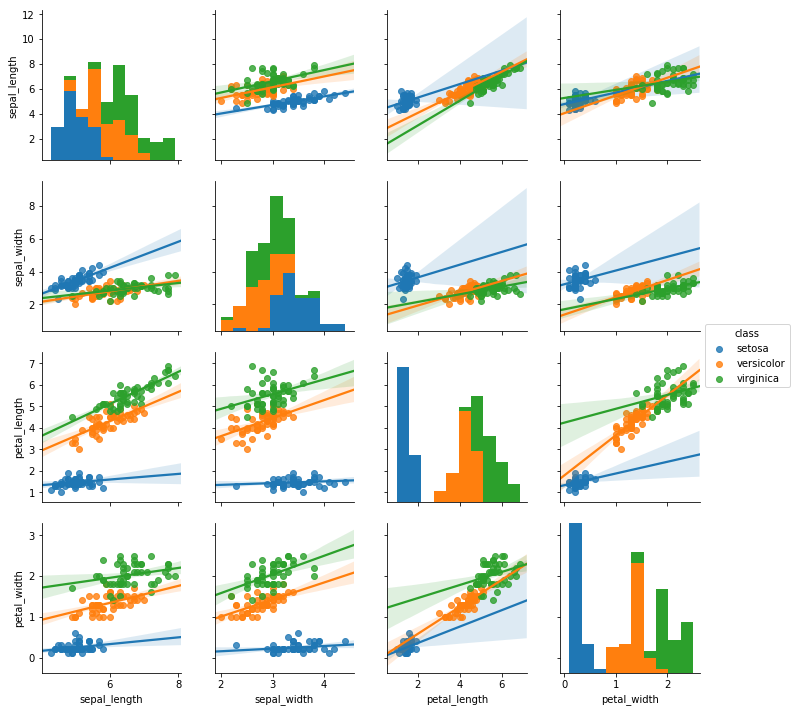

In [10]:
sns.pairplot(df, hue="class", kind="reg")

## Inputs and outputs

So we can't divide the flower types with linear regression so what we will do instead is use KNeighborsClassifier to try and perdict what each flower is by the 4 closest flowers to it. First though we will need to divide the flowers into inputs(our measurements) and outputs (our iris types)

We will set the inputs as 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' from the data frame. 
We will also set the outputs as 'class' from the data frame. So our inputs will be our size and outut will be the type of iris it is. 

In [11]:
inputs = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
outputs = df['class']

## Classifier

KNeighborsClassifier will grab the in our case 5 nearest neighbours including ourself and assume that our flower will be the same as the four nearest neighbours. 

So what we do first is set up KNeighbors. We are going to input that it will use the 5 nearest neighbours (which is default) and  we are going to use weight and set it to uniform(which is default). Uniform just means that the 4 nearest nodes are given the same weight(vote), we could set it to distance where a nearer nodes vote would be valued more than one futher away. So the code could be written as knn = nei.KNeighborsClassifier(). But we will write it out fully just so you can see the layout.

In [12]:
knn = nei.KNeighborsClassifier(n_neighbors=5,weights ='uniform')

## Fit

Now we will fit the model using inputs as training data and outputs as target values.

In [13]:
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Predict

Now we are gonna ask for the values of two of our data frames so we can use knn.perdict to test and see if it can correctly perdict what it should be. 

In [14]:
df.loc[10]#flower 1

sepal_length       5.4
sepal_width        3.7
petal_length       1.5
petal_width        0.2
class           setosa
Name: 10, dtype: object

In [15]:
df.loc[70]#flower 2

sepal_length           5.9
sepal_width            3.2
petal_length           4.8
petal_width            1.8
class           versicolor
Name: 70, dtype: object

Now we will enter those values into knn.perdict to test it

In [16]:
knn.predict([[5.4, 3.7, 1.5, 0.2]])#flower 1

array(['setosa'], dtype=object)

In [17]:
knn.predict([[5.9, 3.2, 4.8, 1.8]])#flower 2

array(['virginica'], dtype=object)

Okay as we can see flower 1 was perdicted correcly but flower two was not. Now what we can try is recreate knneighbour and change weight to see if we can perdict both correctly. 

In [18]:
knn2 = nei.KNeighborsClassifier(n_neighbors=5,weights ='distance')
knn2.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [19]:
knn2.predict([[5.4, 3.7, 1.5, 0.2]])#flower 1


array(['setosa'], dtype=object)

In [20]:
knn2.predict([[5.9, 3.2, 4.8, 1.8]])#flower 2

array(['versicolor'], dtype=object)

Okay so by changing weight to distance instead of uniform we are able to correctly guess our two sample flowers. But lets see what happens when we try against all the flowers.

## Evaluate

Checks to see how many perdictions are correct. Does this by summing up trues as 1 and falses as 0. It will then return how many flowers were correctly identified.  We will do this with both knn(weight = uniform) & knn2(weight = distance) and see how many flowers it correctly identifys. 

In [21]:
(knn.predict(inputs) == outputs).sum()

145

In [22]:
(knn2.predict(inputs) == outputs).sum()

150

Okay so using knn we got 145 correct. But using knn2 we got all 150 correct. Now while this looks promising what if we break the data up so that the dataframe will contain train data and test data. So that our knn's will be tested against data they haven't seen before. 

So we are gonna break the dataframe into test data and train data. Now we will tell it to take 1/3 of the (50) and use them as test data. 

In [23]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

Reruns the nearest neighbour test with only our train data.

In [24]:
knn = nei.KNeighborsClassifier(n_neighbors=5,weights ='uniform')
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
knn2 = nei.KNeighborsClassifier(n_neighbors=5,weights ='distance')
knn2.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

Now uses our test data to see how it will perform against flowers its not being trained on.  

In [26]:
(knn.predict(inputs_test) == outputs_test).sum()

49

In [27]:
(knn2.predict(inputs_test) == outputs_test).sum()

49

Now as we can see the results are the same. Even though we used slightly different ways to train each knneighbour. This is down to the fact that the iris flower data frame has a lot of crossover in size as we saw in our graph. Now also the reason why knn2 was able to get them all right when we trained it with our entire data frame versus when we seperated it out into train and test data was because when we take in the training data the size of the flower that we would test against was recoreded. So that when we tested with 5 nearest negibhours the closest one was the flower we were testing and it got the biggest vote. This is one of the reasons it is always best practise to seperate your data into training data and testing data.  

## References


[K-nearest Neighbors (KNN) Classification Model](https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/)  
[Iris Data Set ](http://archive.ics.uci.edu/ml/datasets/Iris)  
[Pandas Documentation](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html)  
[Seaborn Documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)  
[]()
[]()
[]()
[]()


